In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch, VerticalPitch
from mplsoccer.utils import FontManager

import json

In [2]:
#df = pd.read_json("data/competitions.json")

#match = pd.read_json("data/matches/16/4.json")

#lineup = pd.read_json("data/lineups/22912.json")

events = pd.read_json("data/events/22912.json")

In [3]:
home_lp = events["tactics"][0]["lineup"]
away_lp = events["tactics"][1]["lineup"]

In [4]:
# id to map coordinates dict

pos_dict = {
    1: [117,40],
    2: [105,10],
    3: [105,30],
    4: [105,40],
    5: [105,50],
    6: [105,70],
    7: [95,10],
    8: [95,22],
    9: [95,40],
    10: [95,58],
    11: [95,70],
    12: [85,10],
    13: [85,22],
    14: [85,40],
    15: [85,58],
    16: [85,70],
    17: [75,10],
    18: [75,22],
    19: [75,40],
    20: [75,58],
    21: [75,70],
    22: [65,20],
    23: [65,40],
    24: [65,60],
    25: [1,40]
}

In [5]:
# Transforming the positions in map coordinates
# Creating two list posx and posy for plotting

pos_home = []
for i in range(0,len(home_lp)):
    posx_home = pos_dict.get(home_lp[i]["position"]["id"])[0]
    posy_home = pos_dict.get(home_lp[i]["position"]["id"])[1]
    
    pos_home.append(
        [
            home_lp[i]["player"]["name"], [posx_home,posy_home]
        ]
    )

posx_home = []
posy_home = []
for j in range(0,len(home_lp)):
    posx_home.append(pos_home[j][1][0])
    posy_home.append(pos_home[j][1][1])
    
pos_home

[['Hugo Lloris', [117, 40]],
 ['Kieran Trippier', [105, 10]],
 ['Toby Alderweireld', [105, 30]],
 ['Jan Vertonghen', [105, 50]],
 ['Danny Rose', [105, 70]],
 ['Moussa Sissoko', [95, 40]],
 ['Harry Winks', [85, 58]],
 ['Christian Dannemann Eriksen', [75, 10]],
 ['Bamidele Alli', [75, 40]],
 ['Heung-Min Son', [75, 70]],
 ['Harry Kane', [65, 40]]]

In [6]:
# Transforming the positions in map coordinates
# Creating two list posx and posy for plotting

pos_away = []
for i in range(0,len(home_lp)):
    posx_away = pos_dict.get(home_lp[i]["position"]["id"])[0]
    posy_away = pos_dict.get(home_lp[i]["position"]["id"])[1]
    
    pos_away.append(
        [
            away_lp[i]["player"]["name"], [posx_away,posy_away]
        ]
    )

posx_away = []
posy_away = []
for j in range(0,len(away_lp)):
    posx_away.append(pos_away[j][1][0])
    posy_away.append(pos_away[j][1][1])
    
pos_away

[['Alisson Ramsés Becker', [117, 40]],
 ['Trent Alexander-Arnold', [105, 10]],
 ['Joël Andre Job Matip', [105, 30]],
 ['Virgil van Dijk', [105, 50]],
 ['Andrew Robertson', [105, 70]],
 ['Fábio Henrique Tavares', [95, 40]],
 ['Jordan Brian Henderson', [85, 58]],
 ['Georginio Wijnaldum', [75, 10]],
 ['Mohamed Salah', [75, 40]],
 ['Sadio Mané', [75, 70]],
 ['Roberto Firmino Barbosa de Oliveira', [65, 40]]]

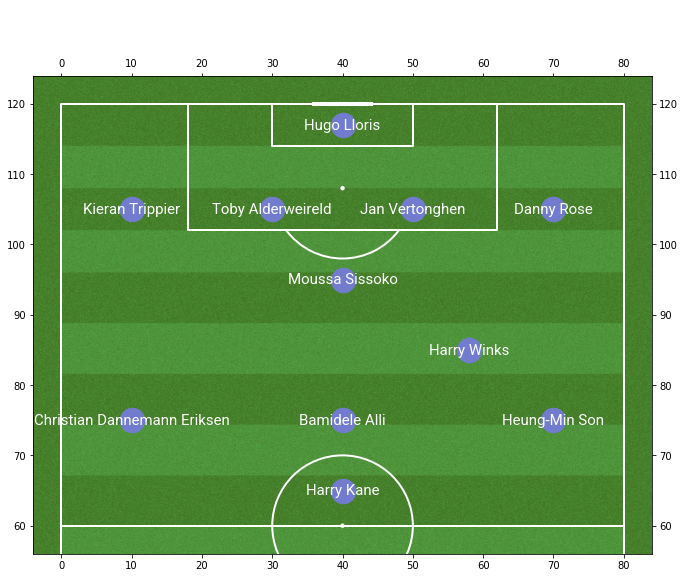

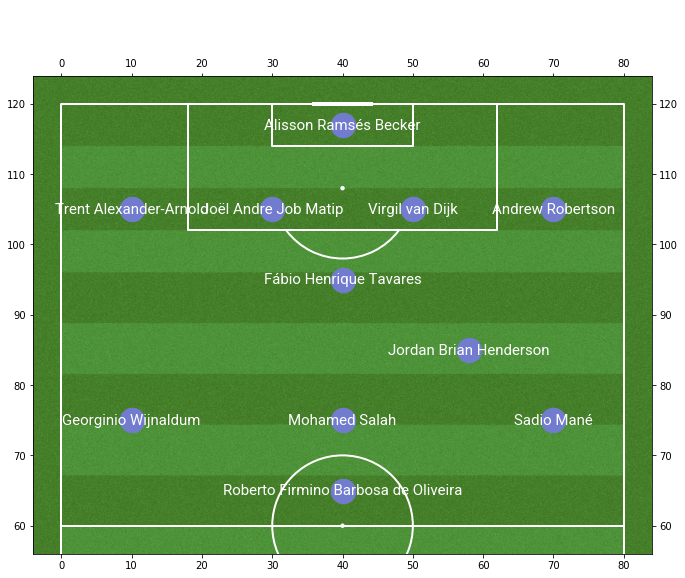

In [7]:
pitch = VerticalPitch(pitch_color='grass', line_color='white',
              stripe=True, half=True, axis=True, label=True, tick=True)  # optional stripes


fig, ax = pitch.grid(figheight=8, endnote_height=0,  # no endnote
                      title_height=0.1, title_space=0.02,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.83)
    
sc1 = pitch.scatter(posx_home, posy_home, s=600, c='#727cce', ax=ax['pitch'])

# fontmanager for google font (robotto)
robotto_regular = FontManager()

# plot the jersey numbers
for i in range(0, len(pos_home)):
    pitch.annotate(pos_home[i][0], (pos_home[i][1][0], pos_home[i][1][1]),
                   va='center', ha='center', color='white',
                   fontproperties=robotto_regular.prop, fontsize=15, ax=ax['pitch'])
    
    
pitch2 = VerticalPitch(pitch_color='grass', line_color='white',
              stripe=True, half=True, axis=True, label=True, tick=True)  # optional stripes


fig, ax = pitch2.grid(figheight=8, endnote_height=0,  # no endnote
                      title_height=0.1, title_space=0.02,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.83)
    
sc1 = pitch.scatter(posx_away, posy_away, s=600, c='#727cce', ax=ax['pitch'])

# fontmanager for google font (robotto)
robotto_regular = FontManager()

# plot the jersey numbers
for i in range(0, len(pos_away)):
    pitch2.annotate(pos_away[i][0], (pos_away[i][1][0], pos_away[i][1][1]),
                   va='center', ha='center', color='white',
                   fontproperties=robotto_regular.prop, fontsize=15, ax=ax['pitch'])